In [56]:
#fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#data files
scores = "Datasets/superbowl.csv"
ads = "Datasets/superbowl-ads.csv"

#data reads
score_df = pd.read_csv(scores)
ad_df = pd.read_csv(ads)

#displaying data table for preview
ad_df

,index,year,brand,superbowl_ads_dot_com_url,youtube_url,Genre,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex,likes,dislikes,ratio,theme,theme_2,altruistic/consumerist
0,0,2018,Toyota,https://superbowl-ads.com/good-odds-toyota/,https://www.youtube.com/watch?v=zeBZvwYQ-hA,Automotive,False,False,False,False,False,False,False,1400.0,43.0,0.97,inspirational,paralympics,altruistic
1,1,2020,Bud Light,https://superbowl-ads.com/2020-bud-light-seltz...,https://www.youtube.com/watch?v=nbbp0VW7z8w,Beer,True,True,False,True,True,False,False,1200.0,26.0,0.98,shopping,NaN,consumerist
2,2,2006,Bud Light,https://superbowl-ads.com/2006-bud-light-bear-...,https://www.youtube.com/watch?v=yk0MQD5YgV8,Beer,True,False,False,False,True,True,False,131.0,16.0,0.89,NaN,NaN,consumerist
3,3,2018,Hynudai,https://superbowl-ads.com/hope-detector-nfl-su...,https://www.youtube.com/watch?v=lNPccrGk77A,Automotive,False,True,False,False,False,False,False,2.0,0.0,1.00,inspirational,NaN,awareness
4,4,2003,Bud Light,https://superbowl-ads.com/2003-bud-light-hermi...,https://www.youtube.com/watch?v=ovQYgnXHooY,Beer,True,True,False,False,True,True,True,20.0,0.0,1.00,NaN,NaN,consumerist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,2014,NFL,https://superbowl-ads.com/nfl-now/,NaN,Football,False,True,False,False,False,False,False,NaN,NaN,NaN,informative,NaN,consumerist
240,240,2012,Budweiser,https://superbowl-ads.com/2012-budweiser-etern...,https://www.youtube.com/watch?v=_GeiOdHsW_8,Beer,False,True,True,False,False,True,True,598.0,101.0,0.86,NaN,NaN,consumerist
241,241,2001,Pepsi,https://superbowl-ads.com/2001-pepsi-kasparov-...,https://www.youtube.com/watch?v=pldGc0Cpf84,Soft Drink,True,False,False,True,True,False,False,21.0,0.0,1.00,chess,NaN,consumerist
242,242,2001,E-Trade,https://superbowl-ads.com/2001-etrade-security...,https://www.youtube.com/watch?v=39BL7iqe6pQ,Trading,True,False,False,False,True,False,False,14.0,5.0,0.74,NaN,NaN,consumerist


In [57]:
#grabbing all unique genres
genres = ad_df.Genre.unique()
print(genres)

#also removing non_data columns from df for readability
ad_df.drop('superbowl_ads_dot_com_url', inplace=True, axis=1)
ad_df.drop('youtube_url', inplace=True, axis=1)
ad_df.drop('index', inplace=True, axis=1)

['Automotive' 'Beer' 'Soft Drink' 'Football' 'Chips' 'Trading']


In [58]:
#sorting
ad_df = ad_df.sort_values(by=['year'])

In [59]:
#getting list of altruistic ads and consumerist ads
alt_ads = ad_df.loc[ad_df['altruistic/consumerist'] == 'altruistic']
con_ads = ad_df.loc[ad_df['altruistic/consumerist'] == 'consumerist']
alt_ads

,year,brand,Genre,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex,likes,dislikes,ratio,theme,theme_2,altruistic/consumerist
243,2001,Budweiser,Beer,False,False,False,True,False,False,False,360.0,5.0,0.99,family,NaN,altruistic
102,2014,Budweiser,Beer,False,False,True,False,False,True,False,NaN,NaN,NaN,together,NaN,altruistic
78,2016,Budweiser,Beer,False,True,False,True,False,False,False,NaN,NaN,NaN,informative,NaN,altruistic
88,2017,Hynudai,Automotive,False,False,True,False,False,False,False,NaN,NaN,NaN,together,NaN,altruistic
54,2017,Kia,Automotive,True,False,False,True,True,True,False,NaN,NaN,NaN,inspirational,NaN,altruistic
0,2018,Toyota,Automotive,False,False,False,False,False,False,False,1400.0,43.0,0.97,inspirational,paralympics,altruistic
107,2018,Budweiser,Beer,False,False,True,False,False,False,False,176.0,10.0,0.95,together,informative,altruistic
96,2019,Budweiser,Beer,False,False,False,False,False,True,False,NaN,NaN,NaN,together,NaN,altruistic


In [60]:
#grabbing means
alt_ads_mean = alt_ads["ratio"].mean()
alt_ads_mean = f'{alt_ads_mean * 100}%'
print(f'The average like ratio of altruistic ads is {alt_ads_mean}')
con_ads_mean = con_ads["ratio"].mean()
con_ads_mean = f'{con_ads_mean * 100}%'
print(f'The average like ratio of consumerist ads is {con_ads_mean}')

The average like ratio of altruistic ads is 97.00000000000001%
The average like ratio of consumerist ads is 92.37878787878786%


In [61]:
#gathering ad counts to prepare bar graph
total_ads = ad_df.count()['year']
print(f'The total count of ads are {total_ads}')
total_alt_ads = alt_ads.count()['year']
print(f'The total count of altruistics ads are {total_alt_ads}')
total_con_ads = con_ads.count()['year']
print(f'The total count of consumeristic ads are {total_con_ads}')

The total count of ads are 244
The total count of altruistics ads are 8
The total count of consumeristic ads are 235


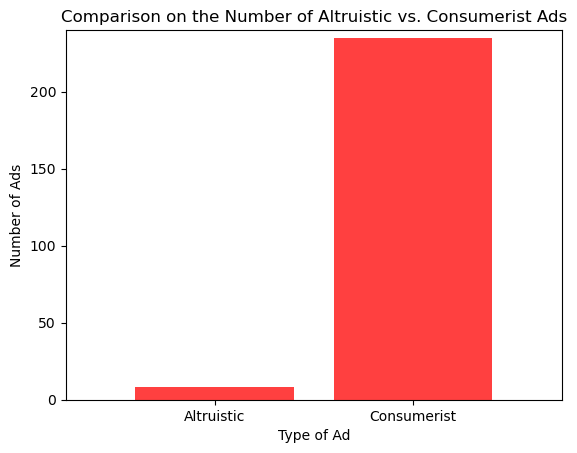

In [62]:
#preparing plot
type_of_ads = ["Altruistic", "Consumerist"]
number_of_ads = [total_alt_ads, total_con_ads]

x_axis = np.arange(0, len(type_of_ads))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Comparison on the Number of Altruistic vs. Consumerist Ads")
plt.xlabel("Type of Ad")
plt.ylabel("Number of Ads")

plt.xlim(-0.75, len(type_of_ads)-.25)
plt.ylim(0, max(number_of_ads) + 5)

plt.bar(x_axis, number_of_ads, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, type_of_ads)
plt.show()
#DON'T FORGET TO compare the like and dislike ratios

In [81]:
#grabbing all unique themes
theme1 = ad_df.dropna().theme.unique()
theme2 = ad_df.dropna().theme_2.unique()
themes = np.hstack((theme1, theme2))
print(themes)
uniq_themes = ['Familial','Informative','Inspirational','Nostalgic','Togetherness']
test_themes = ['Familial','Nostalgic']

['nostalgia' 'robot' 'inspirational' 'together' 'informative' 'family'
 'together' 'fighting' 'inspirational' 'family' 'paralympics'
 'informative']


In [77]:
#grabbing the number of ads per theme (family, informative, inspirational, nostalgia, together)

#familial ads
familial_ads_col1 = ad_df.loc[ad_df['theme'] == 'family']
familial_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'family']
familial_ads = pd.concat([familial_ads_col1, familial_ads_col2])
fam_ad_count = familial_ads.count()['year']
print(f'The number of familial ads is {fam_ad_count}.')

#please construct the rest of the themes: informative(inf) inspirational(insp) jump over nostalgia and do together(tog)

#nostalgic ads
nostalgic_ads_col1 = ad_df.loc[ad_df['theme'] == 'nostalgia']
nostalgic_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'nostalgia']
nostalgic_ads = pd.concat([nostalgic_ads_col1, nostalgic_ads_col2])
nos_ad_count = nostalgic_ads.count()['year']
print(f'The number of nostalgic ads is {nos_ad_count}.')

The number of familial ads is 19.
The number of nostalgic ads is 16.


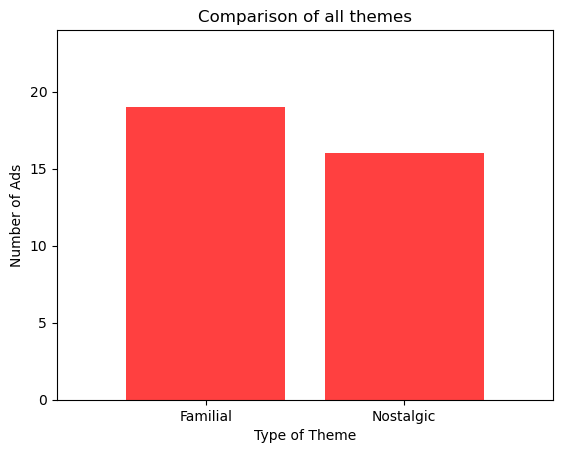

In [86]:
#preparing plot
theme_count = [fam_ad_count, nos_ad_count]

x_axis = np.arange(0, len(test_themes))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Comparison of all themes")
plt.xlabel("Type of Theme")
plt.ylabel("Number of Ads")

plt.xlim(-0.75, len(test_themes)-.25)
plt.ylim(0, max(theme_count) + 5)

plt.bar(x_axis, theme_count, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, test_themes)
plt.show()
#DON'T FORGET TO compare the like and dislike ratios